In [74]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from datetime import datetime

In [17]:
df = pd.read_csv('coderun.csv')
df.head(5)

,id,created_at,problem_id,user_id,language_id
0,1,2021-04-07 06:06:20.000,13,10,3
1,2,2021-03-31 07:10:06.000,15,13,3
2,3,2021-04-04 14:55:26.000,1,6,3
3,4,2021-03-29 21:24:51.000,26,4,3
4,5,2021-03-30 11:29:12.000,21,18,3


In [88]:
df['ymd'] = pd.to_datetime(df['created_at']).dt.date
df['ym'] = pd.to_datetime(df['created_at']).dt.to_period('M')
df.head(5)

,id,created_at,problem_id,user_id,language_id,ymd,ym
0,1,2021-04-07 06:06:20.000,13,10,3,2021-04-07,2021-04
1,2,2021-03-31 07:10:06.000,15,13,3,2021-03-31,2021-03
2,3,2021-04-04 14:55:26.000,1,6,3,2021-04-04,2021-04
3,4,2021-03-29 21:24:51.000,26,4,3,2021-03-29,2021-03
4,5,2021-03-30 11:29:12.000,21,18,3,2021-03-30,2021-03


### Вопрос №1
Постройте график динамики количества попыток по дням, а также наглядно покажите связь со средним значением. Выберите верные утверждения - что можно сказать по этому графику.

- С течением времени наблюдается стабильный рост попыток
- Пик приходится на январь-февраль 2022
- Активность началась только в ноябре 2021, до этого все дни был равномерный ноль или единичные попытки, без всплесков
- Начиная с ноября 2021 количество попыток не опускалось ниже среднего за весь период
- До декабря 2021 количество попыток ни разу не превышало среднее значение за весь период
- Было несколько дней со значением более 800


In [20]:
q1 = df.groupby(['ymd'])[['id','language_id']].agg({'id': 'count'}).reset_index()
q1

,ymd,id
0,2021-03-27,1
1,2021-03-28,1
2,2021-03-29,2
3,2021-03-30,1
4,2021-03-31,2
...,...,...
139,2022-01-29,390
140,2022-01-30,189
141,2022-01-31,400
142,2022-02-01,411


In [23]:
q1_mean = q1['id'].mean()
q1_mean

138.88888888888889

C:\Temp\ipykernel_9516\57226132.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(), rotation=45);


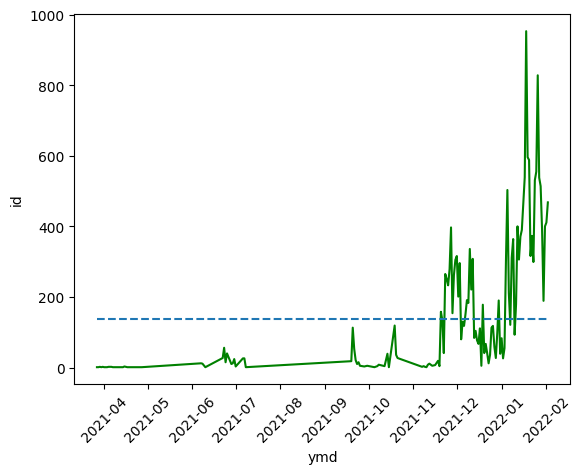

In [38]:
fig = sns.lineplot(data=q1, x='ymd', y='id', color='green');
sns.lineplot(data=q1, x='ymd', y=q1_mean, linestyle='--');
fig.set_xticklabels(fig.get_xticklabels(), rotation=45);

### Ответ №1
- `-` С течением времени наблюдается стабильный рост попыток
- `+` **Пик приходится на январь-февраль 2022**
- `-` Активность началась только в ноябре 2021, до этого все дни был равномерный ноль или единичные попытки, без всплесков
- `-` Начиная с ноября 2021 количество попыток не опускалось ниже среднего за весь период
- `-` До декабря 2021 количество попыток ни разу не превышало среднее значение за весь период
- `+` **Было несколько дней со значением более 800**

### Вопрос №2
На одном графике изобразите два боксплота по дневному количеству попыток за весь период с разбивкой по языкам. Выберите верные утверждения - что можно сказать по этому графику.

- Максимальное значение дневного количества попыток среди двух языков примерно равно
- У языка с ID=2 большая вариативность количества попыток - в некоторые дни делается немного попыток, а в некоторые много
- Максимальное количество попыток и количество выбросов в каждой группе имеет прямую зависимость: если больше одно, то больше и другое
- Среднее значение у языка с ID=2 больше, чем у языка с ID=3
- Нельзя точно сказать, в какой группе больше количество измерений
- Количество попыток, которое больше 25% общего числа попыток в группе с ID=2, примерно равно количеству попыток, которое больше 75% общего числа попыток в группе с ID=3 

In [41]:
q2 = df.groupby(['ymd','language_id'])[['id']].agg({'id': 'count'}).reset_index()
q2

,ymd,language_id,id
0,2021-03-27,3,1
1,2021-03-28,3,1
2,2021-03-29,3,2
3,2021-03-30,3,1
4,2021-03-31,3,2
...,...,...,...
222,2022-01-31,3,88
223,2022-02-01,2,360
224,2022-02-01,3,51
225,2022-02-02,2,425


C:\Temp\ipykernel_9516\3639460682.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(), rotation=45);


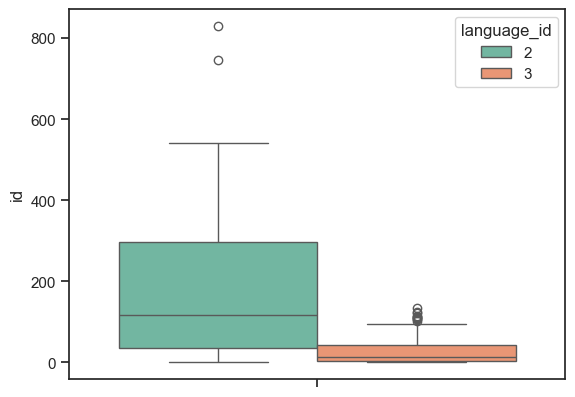

In [160]:
fig = sns.boxplot(data=q2, y='id', hue='language_id', palette='Set2');
fig.set_xticklabels(fig.get_xticklabels(), rotation=45);

### Ответ №2
- `-` Максимальное значение дневного количества попыток среди двух языков примерно равно
- `+` У языка с ID=2 большая вариативность количества попыток - в некоторые дни делается немного попыток, а в некоторые много
- `-` Максимальное количество попыток и количество выбросов в каждой группе имеет прямую зависимость: если больше одно, то больше и другое
- `-` Среднее значение у языка с ID=2 больше, чем у языка с ID=3
- `+` Нельзя точно сказать, в какой группе больше количество измерений
- `+` Количество попыток, которое больше 25% общего числа попыток в группе с ID=2, примерно равно количеству попыток, которое больше 75% общего числа попыток в группе с ID=3 

### Вопрос №3
На одном графике изобразите боксплоты, которые показывают распределение по дневному количеству попыток за период с декабря 2021 года и с разбивкой по месяцам, а внутри каждого месяца - по языкам. Выберите верные утверждения - что можно сказать по этому графику.
- Распределение попыток для двух языков менялось примерно с одинаковыми темпами в рамках этих нескольких месяцев
- Разброс количества попыток, которые лежат между нижним и верхним квартилем, от месяца к месяцу растёт в группе с languade_id=2
- В последний месяц количество измерений существенно ниже других периодов
- В последний месяц очень сильно снизилась вариативность дневного количества попыток в обеих группах
- Допустим, в декабре 2021 года для languade_id=2 первый квартиль имеет значение 75, медиана - 100, а третий квартиль - 175. В таком случае, согласно графику, было больше дней с количеством попыток от 100 до 175, чем с количеством попыток от 75 до 100

In [161]:
q3 = df.groupby(['ym', 'ymd', 'language_id'])[['problem_id']].agg({'problem_id': 'count'}).reset_index()
q3 = q3[q3['ym'] >= '2021-12']
q3

,ym,ymd,language_id,problem_id
103,2021-12,2021-12-01,2,310
104,2021-12,2021-12-01,3,6
105,2021-12,2021-12-02,2,164
106,2021-12,2021-12-02,3,37
107,2021-12,2021-12-03,2,248
...,...,...,...,...
222,2022-01,2022-01-31,3,88
223,2022-02,2022-02-01,2,360
224,2022-02,2022-02-01,3,51
225,2022-02,2022-02-02,2,425


C:\Temp\ipykernel_9516\3799071463.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(), rotation=45);


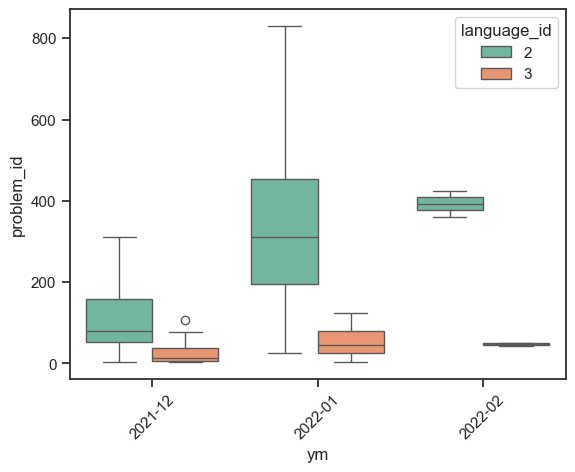

In [167]:
fig = sns.boxplot(data=q3, y='problem_id', x='ym', hue='language_id', palette='Set2');
fig.set_xticklabels(fig.get_xticklabels(), rotation=45);

### Ответ №3
- `-` Распределение попыток для двух языков менялось примерно с одинаковыми темпами в рамках этих нескольких месяцев
- `-` Разброс количества попыток, которые лежат между нижним и верхним квартилем, от месяца к месяцу растёт в группе с languade_id=2
- `-` В последний месяц количество измерений существенно ниже других периодов
- `+` В последний месяц очень сильно снизилась вариативность дневного количества попыток в обеих группах
- `-` Допустим, в декабре 2021 года для languade_id=2 первый квартиль имеет значение 75, медиана - 100, а третий квартиль - 175. В таком случае, согласно графику, было больше дней с количеством попыток от 100 до 175, чем с количеством попыток от 75 до 100

### Вопрос №4
Вы хотите проверить гипотезу о том, что чем позже пользователь регистрировался на платформе, тем большее количество уникальных задач он решал. Отобразите это на диаграмме рассеяния. Выберите верные утверждения - что можно сказать по этому графику.
- Нельзя судить о какой-то линейной связи между этими переменными
- Линейная связь между переменными  хорошо прослеживается
- Хорошо видна обратная зависимость
- В каждой "сотне" пользователей есть отдельные люди, кто много решал задачи
- Основная масса пользователей решала до 20 задач
- Среди пользователей, которые зарегистрировались позже, меньше людей, которые решали много задач

In [176]:
q4 = df.groupby(['user_id'])[['problem_id']].agg({'problem_id': 'nunique'}).reset_index()
q4

,user_id,problem_id
0,1,2
1,2,4
2,3,3
3,4,1
4,5,1
...,...,...
372,1050,9
373,1054,1
374,1057,2
375,1061,2


<Axes: xlabel='user_id', ylabel='problem_id'>

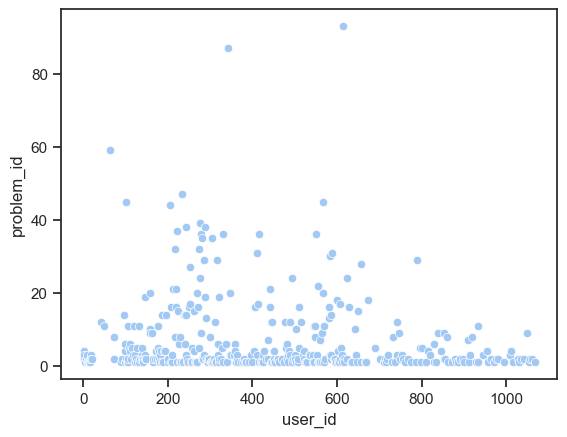

In [178]:
sns.scatterplot(data=q4, x='user_id', y='problem_id')

### Ответ №4
- `+` Нельзя судить о какой-то линейной связи между этими переменными
- `-` Линейная связь между переменными  хорошо прослеживается
- `-` Хорошо видна обратная зависимость
- `+` В каждой "сотне" пользователей есть отдельные люди, кто много решал задачи
- `+` Основная масса пользователей решала до 20 задач
- `+` Среди пользователей, которые зарегистрировались позже, меньше людей, которые решали много задач

### Вопрос №5
Вы хотите проверить гипотезу о том, что есть корреляция между средним количеством попыток, которые делает пользователь для решения одной задачи, максимальным количеством попыток и минимальным. Проверьте эту гипотезу с помощью построения матрицы корреляций. Выберите верные утверждения - что можно сказать по этому графику.
- Если считать корреляцию более 60% сильной, то есть как минимум 2 пары признаков с сильной корреляцией
- Есть только одна пара признаков со слабой корреляцией
- Между несколькими признаками наблюдается слабая корреляция
- Есть признаки со 100% корреляцией
- Есть признаки с сильной обратной зависимостью
- Среднее количество попыток примерно одинаково коррелирует и с максимальным, и с минимальным

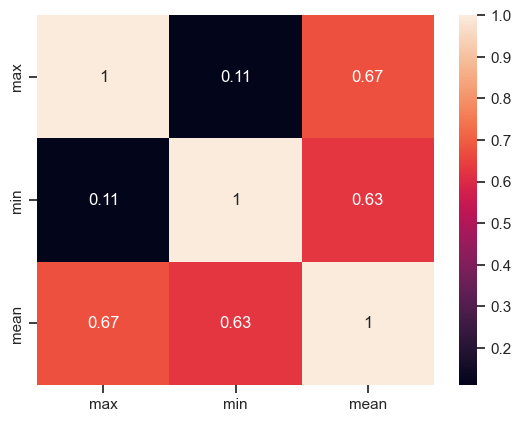

In [198]:
q5 = df.groupby(['user_id', 'problem_id'])['language_id'].agg({'count'}).reset_index()[['user_id', 'count']].groupby('user_id')['count'].agg({'max', 'min', 'mean'}).reset_index()
sns.heatmap(q5[['max', 'min', 'mean']].corr(), annot=True);

- `+` Если считать корреляцию более 60% сильной, то есть как минимум 2 пары признаков с сильной корреляцией
- `+` Есть только одна пара признаков со слабой корреляцией
- `-` Между несколькими признаками наблюдается слабая корреляция
- `-` Есть признаки со 100% корреляцией
- `-` Есть признаки с сильной обратной зависимостью
- `+` Среднее количество попыток примерно одинаково коррелирует и с максимальным, и с минимальным

### Вопрос №6
Постройте график n-day retention с разбивкой по когортам до 30 n-дня. Под когортой понимайте год и месяц решения первой задачи каждым пользователем - от этого момента начинается отсчет. Учитывайте только когорты после ноября 2021 года включительно. График стройте не по процентам retention, а по количеству уникальных пользователей в каждый n-день в каждой когорте. Выберите верные утверждения - что можно сказать по этому графику.
- Каждая когорта состоит из примерно одинакового количества людей
- Ранние когорты имеют лучшее удержание в долгосрочной перспективе
- График retention некоторых когорт имеет нестандартную форму
- Судя по графику, вероятнее всего в районе 5 дня происходит email-рассылка и стимулирует заново посетить платформу
- Пользователи когорты января 2022 года продолжают очень активно пользоваться сервисом примерно с той же интенсивностью на 20 день, как и на 10
- Среди всех когорт наблюдается слабое удержание - примерно на 10 день посещения падают почти до нуля

In [253]:
q6 = df[df['ym'] >= '2021-11']
q6['first_day'] = q6.groupby('user_id')['ymd'].transform('min')
q6['days'] = (pd.to_datetime(q6['ymd']) - pd.to_datetime(q6['first_day'])).dt.days
q6 = q6.groupby(['ym','days']).agg({'user_id': 'nunique'}).reset_index()
q6 = q6[q6['days'] <= 30]
q6

C:\Temp\ipykernel_9516\1336018736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q6['first_day'] = q6.groupby('user_id')['ymd'].transform('min')
C:\Temp\ipykernel_9516\1336018736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q6['days'] = (pd.to_datetime(q6['ymd']) - pd.to_datetime(q6['first_day'])).dt.days


,ym,days,user_id
0,2021-11,0,94
1,2021-11,1,23
2,2021-11,2,13
3,2021-11,3,8
4,2021-11,4,9
...,...,...,...
139,2022-02,18,1
140,2022-02,19,3
141,2022-02,20,2
142,2022-02,21,1


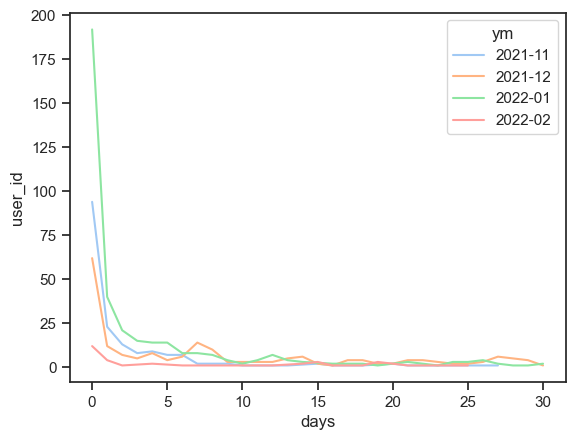

In [254]:
sns.lineplot(data=q6, x='days', y='user_id', hue='ym');

### Ответы №6
- `-` Каждая когорта состоит из примерно одинакового количества людей
- `+` Ранние когорты имеют лучшее удержание в долгосрочной перспективе
- `+`График retention некоторых когорт имеет нестандартную форму
- `-` Судя по графику, вероятнее всего в районе 5 дня происходит email-рассылка и стимулирует заново посетить платформу
- `-` Пользователи когорты января 2022 года продолжают очень активно пользоваться сервисом примерно с той же интенсивностью на 20 день, как и на 10
- `+`Среди всех когорт наблюдается слабое удержание - примерно на 10 день посещения падают почти до нуля

### Вопрос №7
Для оценки распределения хорошо использовать не только boxplot, но и скрипичную диаграмму - violinplot. Она дает сильно больше информации, чем простой ящик с усами. Например, такой график есть в seaborn.

Отобразите на графике распределение числа уникальных пользователей, сгруппированных по датам совершения попытки, в разрезе языков.

Выберите верные утверждения - что можно сказать по этому графику.

- Между первым и третьим квартилем распределение данных внутри 2 языка более равномерное, чем внутри 3
- Первый квартиль между двумя группами почти совпадает
- Положение точки медианы между 1 и 3 квартилем напрямую зависит от равномерности распределения данных внутри этого промежутка: чем более равномерные дынные, тем ближе точка медианы к центру
- Есть некоторое количество дней, в которых задачи с языком 2 решает больше пользователей, чем с языком 3

In [267]:
q7 = df.groupby(['ymd', 'language_id'])['user_id'].agg({'nunique'}).reset_index()
q7

,ymd,language_id,nunique
0,2021-03-27,3,1
1,2021-03-28,3,1
2,2021-03-29,3,2
3,2021-03-30,3,1
4,2021-03-31,3,2
...,...,...,...
222,2022-01-31,3,7
223,2022-02-01,2,14
224,2022-02-01,3,11
225,2022-02-02,2,15


C:\Temp\ipykernel_9516\2469608606.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=q7, y='nunique', x='language_id', palette='Set1');


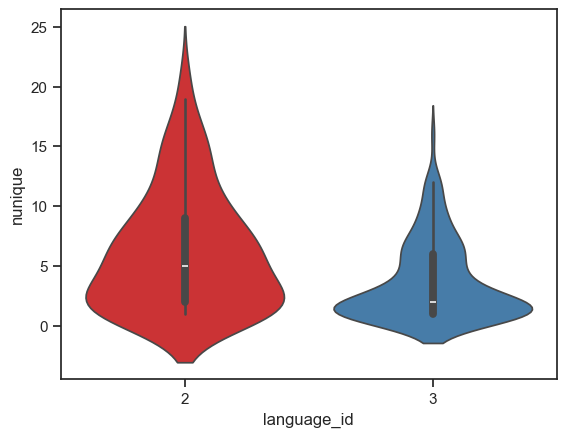

In [272]:
sns.violinplot(data=q7, y='nunique', x='language_id', palette='Set1');

- `+` Между первым и третьим квартилем распределение данных внутри 2 языка более равномерное, чем внутри 3
- `+` Первый квартиль между двумя группами почти совпадает
- `+` Положение точки медианы между 1 и 3 квартилем напрямую зависит от равномерности распределения данных внутри этого промежутка: чем более равномерные дынные, тем ближе точка медианы к центру
- `+` Есть некоторое количество дней, в которых задачи с языком 2 решает больше пользователей, чем с языком 3